In [2]:
#import libraries
import joblib
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [3]:
#load dataset
df = pd.read_csv("data/jiji_car_evaluation.csv")
df.head()

,title,condition,transmission,make,model,year,location,price
0,Honda Odyssey 2007 Gray,foreign used,automatic,Honda,Odyssey,2007.0,Ikeja,"₦ 8,850,000"
1,Land Rover Range Rover 2023 Black,foreign used,automatic,Land,Rover,NaN,Idu Industrial,"₦ 365,000,000"
2,Lexus ES 350 2008 Red,local used,automatic,Lexus,ES,NaN,Alimosho,"₦ 7,250,000"
3,Chrysler 200 C 2WD 2016 Red,foreign used,automatic,Chrysler,200,NaN,Alimosho,"₦ 11,000,000"
4,Toyota Venza AWD 2010 Gray,foreign used,automatic,Toyota,Venza,NaN,Ogba,"₦ 14,200,000"


In [5]:
print(df['year'].unique())

[2007.   nan 2015. 2002. 2008. 2001. 2013. 2016. 2003. 2012. 2004. 2009.
 2005. 2006. 2010. 2019. 2014. 2011. 2018. 2000. 1999. 2020. 1998. 1968.
 2022. 1997. 1995. 1996. 2017. 2021. 2023. 1794. 2024. 1994. 2025.]


In [146]:
df.describe()

,year
count,881.000000
mean,2008.065834
std,8.955837
min,1794.000000
25%,2005.000000
50%,2008.000000
75%,2012.000000
max,2025.000000


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         2000 non-null   object 
 1   condition     2000 non-null   object 
 2   transmission  1994 non-null   object 
 3   make          1773 non-null   object 
 4   model         1773 non-null   object 
 5   year          881 non-null    float64
 6   location      2000 non-null   object 
 7   price         2000 non-null   object 
dtypes: float64(1), object(7)
memory usage: 125.1+ KB


In [148]:
df.isnull().sum()

title              0
condition          0
transmission       6
make             227
model            227
year            1119
location           0
price              0
dtype: int64

In [149]:
df['year'] = df['year'].fillna(round(df['year'].mean()))
df.head()
df.isnull().sum()

title             0
condition         0
transmission      6
make            227
model           227
year              0
location          0
price             0
dtype: int64

In [150]:
df['year'].unique()

array([2007., 2008., 2015., 2002., 2001., 2013., 2016., 2003., 2012.,
       2004., 2009., 2005., 2006., 2010., 2019., 2014., 2011., 2018.,
       2000., 1999., 2020., 1998., 1968., 2022., 1997., 1995., 1996.,
       2017., 2021., 2023., 1794., 2024., 1994., 2025.])

In [151]:
df['price'] = (
    df['price']
        .astype(str)
        .str.replace('₦', '')
        .str.replace(',', '')
        .str.strip()
)
df.head()

,title,condition,transmission,make,model,year,location,price
0,Honda Odyssey 2007 Gray,foreign used,automatic,Honda,Odyssey,2007.0,Ikeja,8850000
1,Land Rover Range Rover 2023 Black,foreign used,automatic,Land,Rover,2008.0,Idu Industrial,365000000
2,Lexus ES 350 2008 Red,local used,automatic,Lexus,ES,2008.0,Alimosho,7250000
3,Chrysler 200 C 2WD 2016 Red,foreign used,automatic,Chrysler,200,2008.0,Alimosho,11000000
4,Toyota Venza AWD 2010 Gray,foreign used,automatic,Toyota,Venza,2008.0,Ogba,14200000


In [152]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         2000 non-null   object 
 1   condition     2000 non-null   object 
 2   transmission  1994 non-null   object 
 3   make          1773 non-null   object 
 4   model         1773 non-null   object 
 5   year          2000 non-null   float64
 6   location      2000 non-null   object 
 7   price         2000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 125.1+ KB


In [153]:
df = df[(df['price'] >= 500_000) & (df['price'] <= 100_000_000)]
df.head()

,title,condition,transmission,make,model,year,location,price
0,Honda Odyssey 2007 Gray,foreign used,automatic,Honda,Odyssey,2007.0,Ikeja,8850000
2,Lexus ES 350 2008 Red,local used,automatic,Lexus,ES,2008.0,Alimosho,7250000
3,Chrysler 200 C 2WD 2016 Red,foreign used,automatic,Chrysler,200,2008.0,Alimosho,11000000
4,Toyota Venza AWD 2010 Gray,foreign used,automatic,Toyota,Venza,2008.0,Ogba,14200000
5,Kia Sportage SX 4dr SUV AWD (2.0L 4cyl Turbo 6...,foreign used,automatic,Kia,Sportage,2008.0,Apapa,28500000


In [154]:
print(df['price'].max())
print(df['year'].min())
print(df['year'].max())

100000000
1968.0
2025.0


In [155]:
#remove outliers from price
Q1 = df['price'].quantile(0.15)
Q3 = df['price'].quantile(0.65)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

<Axes: ylabel='price'>

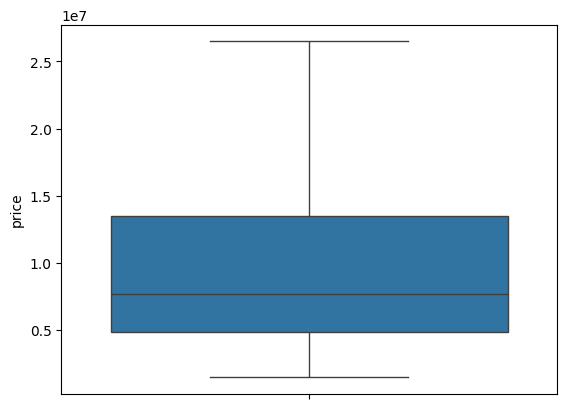

In [156]:
sns.boxplot(df['price'])

In [157]:
#removing outliers from price by condition
#local used car
local_cars = df[df['condition'] == 'local used']
Q1 = local_cars['price'].quantile(0.15)
Q3 = local_cars['price'].quantile(0.65)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

local_car_clean = local_cars[(local_cars['price'] >= lower_bound) & (local_cars['price'] <= upper_bound)]

#new car
new_cars = df[df['condition'] == 'new']
Q1 = new_cars['price'].quantile(0.15)
Q3 = new_cars['price'].quantile(0.65)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

new_car_clean = new_cars[(new_cars['price'] >= lower_bound) & (new_cars['price'] <= upper_bound)]

#foreign used
foreign_cars = df[df['condition'] == 'foreign used']
Q1 = foreign_cars['price'].quantile(0.15)
Q3 = foreign_cars['price'].quantile(0.65)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

foreign_car_clean = foreign_cars[(foreign_cars['price'] >= lower_bound) & (foreign_cars['price'] <= upper_bound)]

df = pd.concat([foreign_car_clean, new_car_clean, local_car_clean], ignore_index=True)
df.head()

,title,condition,transmission,make,model,year,location,price
0,Honda Odyssey 2007 Gray,foreign used,automatic,Honda,Odyssey,2007.0,Ikeja,8850000
1,Chrysler 200 C 2WD 2016 Red,foreign used,automatic,Chrysler,200,2008.0,Alimosho,11000000
2,Toyota Venza AWD 2010 Gray,foreign used,automatic,Toyota,Venza,2008.0,Ogba,14200000
3,Toyota Highlander SE 2012 Blue,foreign used,automatic,Toyota,Highlander,2008.0,Ibadan,19500000
4,Toyota Sienna 2015 White,foreign used,automatic,Toyota,Sienna,2015.0,Agege,21000000


Text(0.5, 1.0, 'Price Distribution by Condition')

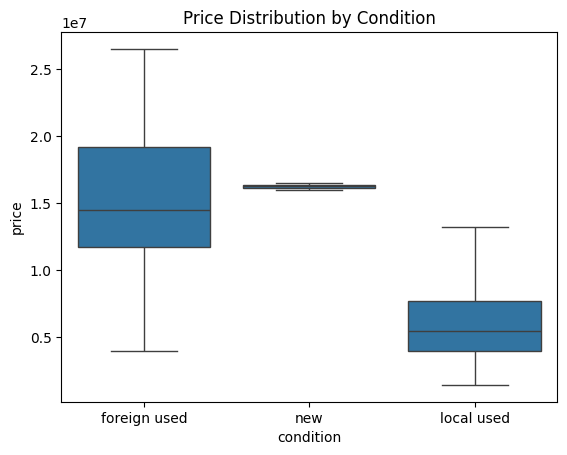

In [158]:
sns.boxplot(x='condition', y='price', data=df)
plt.title('Price Distribution by Condition')

In [159]:
# print(df['year'].min())
# print(df['year'].max())

# Q1 = df['year'].quantile(0.20)
# Q3 = df['year'].quantile(0.70)

# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# df = df[(df['year'] >= lower_bound) & (df['year'] <= upper_bound)]

In [160]:
# sns.boxplot(df['year'])

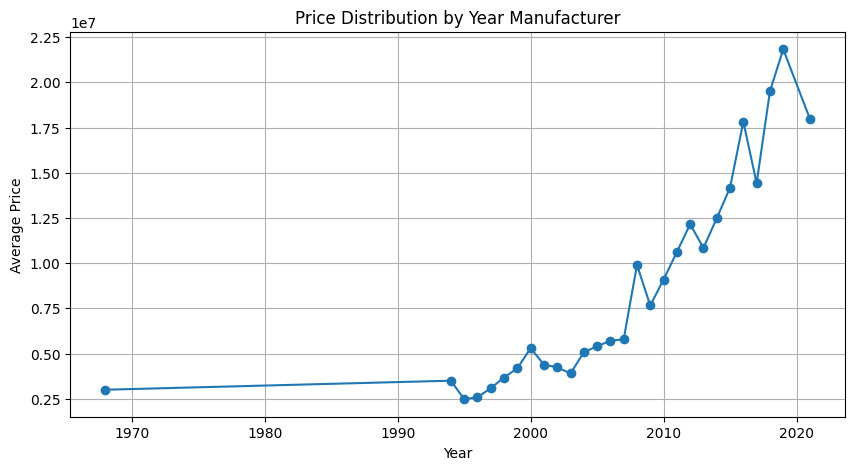

In [161]:
avg_price_by_year = df.groupby('year')['price'].mean()
plt.figure(figsize=(10, 5))
avg_price_by_year.plot(marker='o')
plt.title("Price Distribution by Year Manufacturer")
plt.ylabel("Average Price")
plt.xlabel("Year")
plt.grid(True)
plt.show()

<Axes: >

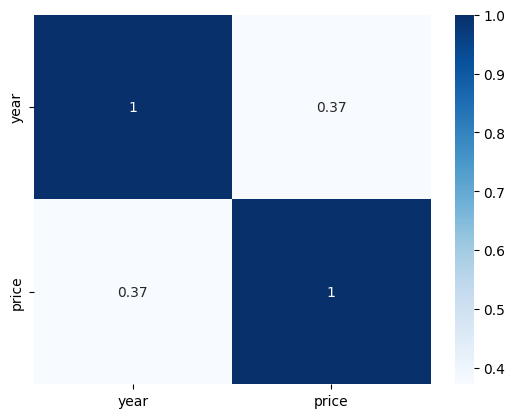

In [162]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='Blues')

In [14]:
cols = ['condition', 'transmission', 'make', 'model', 'location']
label_encoders = {}
for col in cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    label_encoders[col] = encoder
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         2000 non-null   object 
 1   condition     2000 non-null   int64  
 2   transmission  2000 non-null   int64  
 3   make          2000 non-null   int64  
 4   model         2000 non-null   int64  
 5   year          881 non-null    float64
 6   location      2000 non-null   int64  
 7   price         2000 non-null   object 
dtypes: float64(1), int64(5), object(2)
memory usage: 125.1+ KB


In [164]:
features = ['condition', 'transmission', 'make', 'model', 'year', 'location']
target = 'price'

df_multi = df.dropna(subset=features + [target])
X = df_multi[features]
y = df_multi[target]

In [165]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [166]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [167]:
y_pred = model.predict(X_test)

In [168]:
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2 Score: 0.6023020891658223
MAE: 2813555.207721163


In [169]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [170]:
rf_y_pred = rf_model.predict(X_test)

In [171]:
print("R2 Score:", r2_score(y_test, rf_y_pred))
print("MAE:", mean_absolute_error(y_test, rf_y_pred))

R2 Score: 0.6430732974824467
MAE: 2525197.3189059943


In [172]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [173]:
df_y_pred = dt_model.predict(X_test)

In [174]:
print("R2 Score:", r2_score(y_test, df_y_pred))
print("MAE:", mean_absolute_error(y_test, df_y_pred))

R2 Score: 0.49396278573972363
MAE: 2998311.5578125


In [180]:
categories_cols = ['condition', 'transmission', 'make', 'model', 'location']
numeric_col = ['year']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categories_cols),
        ('num', 'passthrough', numeric_col)
    ]
)

pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', GradientBoostingRegressor())
    ]
)
pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [181]:
gb_y_pred = pipeline.predict(X_test)

In [182]:
print("R2 Score:", r2_score(y_test, gb_y_pred))
print("MAE:", mean_absolute_error(y_test, gb_y_pred))

R2 Score: 0.6944269693212965
MAE: 2418964.926745116


In [183]:
best_model = joblib.dump(pipeline, "car_price_model.pkl")
best_model

['car_price_model.pkl']

In [184]:
loaded_model = joblib.load('car_price_model.pkl')
predictions = loaded_model.predict(X_test)
predictions

array([ 7714296.34608535,  8217245.72395902,  3901043.96555151,
       14178410.57828668,  6392303.24387058, 19358784.7739985 ,
        5782593.57375388,  6294407.21809235,  5782593.57375388,
        5684501.00727398,  6294407.21809235, 14034896.30627237,
        4219235.78655539,  7802910.38100647,  8607340.84211271,
        5885643.3639238 , 14178410.57828668, 14161735.43104083,
        6269509.88753654, 10385110.94986742,  6392303.24387058,
       11947155.05061834,  6392303.24387058, 13855627.45881515,
       19016601.99532979,  3901043.96555151,  6147381.92390602,
        4406616.06263414, 14125868.5309737 ,  6269509.88753654,
       14849051.04157712,  8771613.81757975,  5782593.57375388,
        4007162.1746397 , 16653134.72987098,  4063112.44052094,
       19016601.99532979,  6294407.21809235,  5232552.02436211,
        7714296.34608535, 14961243.0939828 , 19016601.99532979,
        7714296.34608535, 14681359.95616036,  6294407.21809235,
       14284528.78737487,  7302158.66341

In [121]:
with open("model.pkl", "wb") as f:
    pickle.dump(gb_model, f)

with open("encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)

In [130]:
print(y_train.nunique())
# print(y_train.describe())

370


In [133]:
print("Target value distribution (y_train):")
print(y_train.describe())
print("\nNumber of unique prices:", y_train.nunique())


Target value distribution (y_train):
count    1.276000e+03
mean     8.823704e+06
std      5.571340e+06
min      1.500000e+06
25%      4.580125e+06
50%      7.175000e+06
75%      1.181250e+07
max      2.650000e+07
Name: price, dtype: float64

Number of unique prices: 370


In [134]:
print("Unique values in training features:")
for col in X_train.columns:
    print(f"{col}: {X_train[col].nunique()}")


Unique values in training features:
condition: 3
transmission: 3
make: 34
model: 175
year: 27
location: 85


In [135]:
sample_1 = pd.DataFrame([{
    "condition": "New",
    "transmission": "Automatic",
    "make": "Toyota",
    "model": "Camry",
    "year": 2021,
    "location": "Lagos"
}])

sample_2 = pd.DataFrame([{
    "condition": "Foreign Used",
    "transmission": "Manual",
    "make": "Honda",
    "model": "Civic",
    "year": 2018,
    "location": "Abuja"
}])

print("Prediction 1:", pipeline.predict(sample_1))
print("Prediction 2:", pipeline.predict(sample_2))


Prediction 1: [16451913.81238191]
Prediction 2: [16451913.81238191]


In [137]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

print("Train R²:", r2_score(y_train, y_pred_train))
print("Test R²:", r2_score(y_test, y_pred_test))
print("Test MAE:", mean_absolute_error(y_test, y_pred_test))


Train R²: 0.7938612341803407
Test R²: 0.695915861587064
Test MAE: 2413886.292288409


In [138]:
from sklearn.linear_model import LinearRegression

pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]
)
pipeline.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [139]:
# Quick diagnostics
print("y_train.describe()")
print(y_train.describe())
print("X_train value counts:")
for col in X_train.columns:
    print(col, X_train[col].value_counts().head())

print("\nTest 2 sample predictions:")
sample_1 = pd.DataFrame([{
    "condition": "New",
    "transmission": "Automatic",
    "make": "Toyota",
    "model": "Camry",
    "year": 2021,
    "location": "Lagos"
}])

sample_2 = pd.DataFrame([{
    "condition": "Foreign Used",
    "transmission": "Manual",
    "make": "Honda",
    "model": "Civic",
    "year": 2018,
    "location": "Abuja"
}])

print("Prediction 1:", pipeline.predict(sample_1))
print("Prediction 2:", pipeline.predict(sample_2))


y_train.describe()
count    1.276000e+03
mean     8.823704e+06
std      5.571340e+06
min      1.500000e+06
25%      4.580125e+06
50%      7.175000e+06
75%      1.181250e+07
max      2.650000e+07
Name: price, dtype: float64
X_train value counts:
condition condition
1    880
0    395
2      1
Name: count, dtype: int64
transmission transmission
0    1207
1      64
2       5
Name: count, dtype: int64
make make
34    437
13    252
21    118
38     83
14     79
Name: count, dtype: int64
model model
51     146
29     119
62      89
200     83
143     57
Name: count, dtype: int64
year year
2008.0    708
2007.0     59
2009.0     57
2005.0     48
2010.0     46
Name: count, dtype: int64
location location
39    125
35    124
5      61
81     55
78     55
Name: count, dtype: int64

Test 2 sample predictions:
Prediction 1: [15775935.33273792]
Prediction 2: [14674228.6361289]


In [7]:
pipeline = joblib.load('car_price_model.pkl')
pipeline

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [9]:
import joblib
model = joblib.load('car_price_model.pkl')

print("Model type:", type(model))
print("Attributes:", dir(model))


Model type: <class 'sklearn.pipeline.Pipeline'>
Attributes: ['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__firstlineno__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__sklearn_is_fitted__', '__sklearn_tags__', '__static_attributes__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_build_request_for_signature', '_can_fit_transform', '_can_inverse_transform', '_can_transform', '_check_method_params', '_doc_link_module', '_doc_link_template', '_doc_link_url_param_generator', '_estimator_type', '_final_estimator', '_fit', '_get_default_requests', '_get_doc_link', '_get_metadata_for_step', '_get_metadata_request', '_get_param_names', '_get_params', 

In [12]:
import json

def export_pipeline_structure(pipeline, output_file='model_structure.json'):
    def serialize_params(params):
        """Convert non-serializable values to strings."""
        return {k: str(v) for k, v in params.items()}

    structure = {
        "model_type": str(type(pipeline)),
        "steps": []
    }

    for name, step in pipeline.steps:
        step_info = {
            "name": name,
            "type": str(type(step)),
            "params": serialize_params(step.get_params())
        }
        structure["steps"].append(step_info)

    with open(output_file, 'w') as f:
        json.dump(structure, f, indent=4)

    print(f"✅ Model structure exported to: {output_file}")


In [13]:
export_pipeline_structure(pipeline)

✅ Model structure exported to: model_structure.json
